In [2]:
import jsonify
import requests
import pickle
import sys
import os
import re
import sklearn
import joblib
from joblib import load
from flask import Flask, render_template, url_for, flash, redirect, request, send_from_directory
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import h5py
%matplotlib inline
import warnings                       
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from datetime import datetime

Using TensorFlow backend.


In [2]:
#from google.colab import drive
#drive.mount('/content/gdrive')
#os.chdir('gdrive/My Drive/kaggle/SmartGrid')

In [3]:
#df = pd.read_csv("data/Data_for_UCI_named.csv")
#df.head(10)

In [4]:
# from google.colab import files
# uploaded = files.upload()

# for name, data in uploaded.items():
#   with open(name, 'wb') as f:
#     f.write(data)
#     print ('saved file', name)

In [5]:
#import io
#df = pd.read_csv(io.BytesIO(uploaded['Data_for_UCI_named.csv']))

In [3]:
df = pd.read_csv("Data_for_UCI_named.csv")

In [7]:
df.head(10)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,-0.670397,-1.902133,0.261793,0.077930,0.542884,0.469931,-0.017385,stable
6,6.710166,3.765204,6.929314,8.818562,2.397419,-0.614590,-1.208826,-0.574004,0.177890,0.397977,0.402046,0.376630,0.005954,unstable
7,6.953512,1.379125,5.719400,7.870307,3.224495,-0.748998,-1.186517,-1.288980,0.371385,0.633204,0.732741,0.380544,0.016634,unstable
8,4.689852,4.007747,1.478573,3.733787,4.041300,-1.410344,-1.238204,-1.392751,0.269708,0.250364,0.164941,0.482439,-0.038677,stable
9,9.841496,1.413822,9.769856,7.641616,4.727595,-1.991363,-0.857637,-1.878594,0.376356,0.544415,0.792039,0.116263,0.012383,unstable


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
tau1     10000 non-null float64
tau2     10000 non-null float64
tau3     10000 non-null float64
tau4     10000 non-null float64
p1       10000 non-null float64
p2       10000 non-null float64
p3       10000 non-null float64
p4       10000 non-null float64
g1       10000 non-null float64
g2       10000 non-null float64
g3       10000 non-null float64
g4       10000 non-null float64
stab     10000 non-null float64
stabf    10000 non-null object
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [9]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403



Total unique labels :  2
unstable    6380
stable      3620
Name: stabf, dtype: int64


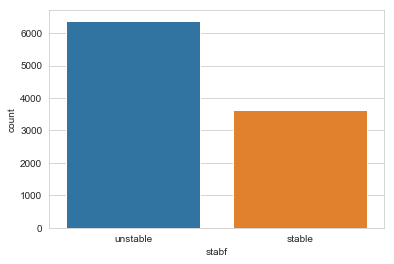

In [10]:
print("\nTotal unique labels : ", df['stabf'].nunique())
print(df['stabf'].value_counts())

sns.set_style('whitegrid')
sns.countplot(x='stabf',data=df)

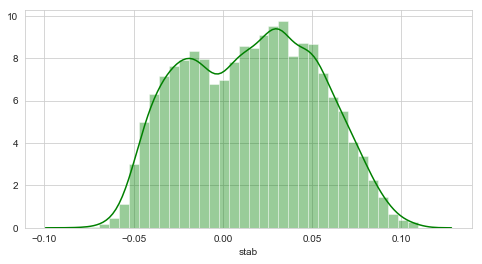

In [11]:
plt.figure(figsize=(8,4))
sns.distplot(df['stab'], color='g')

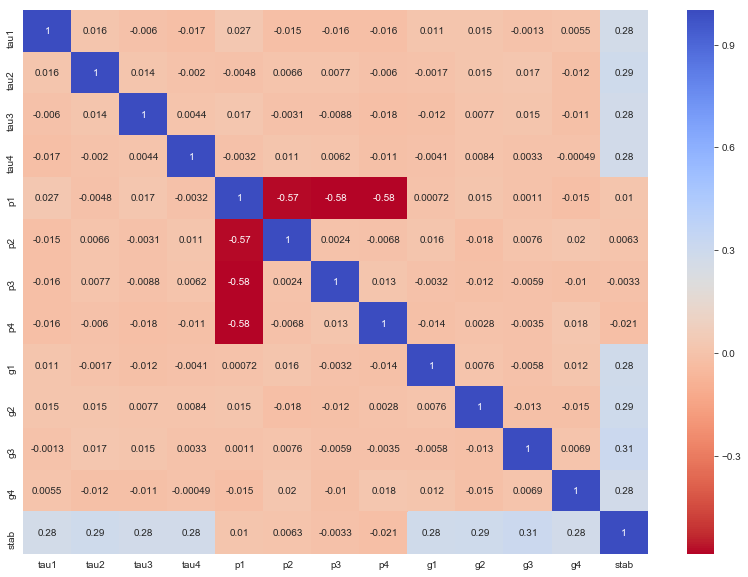

In [12]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm_r')

In [4]:
sns.set()
start_time = datetime.now()

data = df.copy()

map1 = {'unstable': 0, 'stable': 1}
data['stabf'] = data['stabf'].replace(map1)


In [14]:
#X = data.drop(['stab', 'stabf'],axis=1)
#Y = data['stab']

In [15]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,0


In [16]:

#X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=50)
#X_val, X_test, Y_val, Y_test = train_test_split(X_test,Y_test,test_size=0.5,random_state=50)

In [5]:
X = data.iloc[:, :12]
y = data.iloc[:, 13]

X_training = X.iloc[:9000, :]
y_training = y.iloc[:9000]

X_testing = X.iloc[9000:, :]
y_testing = y.iloc[9000:]


In [18]:
#X_testing.iloc[:,:]

In [6]:
X_training = X_training.values
y_training = y_training.values

X_testing = X_testing.values
y_testing = y_testing.values

In [7]:
scaler = StandardScaler()
X_training = scaler.fit_transform(X_training)
X_testing = scaler.transform(X_testing)

In [38]:
joblib.dump(scaler, 'Scaler.joblib')

['Scaler.joblib']

In [22]:
# ANN initialization
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units = 240, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

# Second hidden layer
model.add(Dense(units = 48, kernel_initializer = 'uniform', activation = 'relu'))

# Third hidden layer
model.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))

# Single-node output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# ANN compilation
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [23]:
cross_val_round = 1
print(f'Model evaluation\n')

for train_index, val_index in KFold(15, shuffle=True, random_state=10).split(X_training):
    x_train, x_val = X_training[train_index], X_training[val_index]
    y_train ,y_val = y_training[train_index], y_training[val_index]
    model.fit(x_train, y_train, epochs=100, verbose=0)
    model_loss, model_accuracy = model.evaluate(x_val, y_val)
    print(f'Round {cross_val_round} - Loss: {model_loss:.4f} | Accuracy: {model_accuracy * 100:.2f} %')
    cross_val_round += 1

Model evaluation

Instructions for updating:
Use tf.cast instead.
600/600 [==============================] - 0s 182us/step
Round 1 - Loss: 0.1047 | Accuracy: 97.33 %
600/600 [==============================] - 0s 33us/step
Round 2 - Loss: 0.0339 | Accuracy: 99.00 %
600/600 [==============================] - 0s 37us/step
Round 3 - Loss: 0.0142 | Accuracy: 99.67 %
600/600 [==============================] - 0s 35us/step
Round 4 - Loss: 0.0053 | Accuracy: 99.83 %
600/600 [==============================] - 0s 28us/step
Round 5 - Loss: 0.0165 | Accuracy: 99.83 %
600/600 [==============================] - 0s 32us/step
Round 6 - Loss: 0.0000 | Accuracy: 100.00 %
600/600 [==============================] - 0s 49us/step
Round 7 - Loss: 0.0000 | Accuracy: 100.00 %
600/600 [==============================] - 0s 39us/step
Round 8 - Loss: 0.0055 | Accuracy: 99.67 %
600/600 [==============================] - 0s 42us/step
Round 9 - Loss: 0.0000 | Accuracy: 100.00 %
600/600 [==============================

In [24]:
#X_testing[0].reshape(1,12).shape

In [12]:
y_pred = model.predict(X_testing)
#print(y_pred)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1


In [26]:
# li = list(np.unique(y_pred))
# for i in li:
#     print(round(i,2))
# li = y_pred
# j = 9002
# for i in li:
#     if i[0]>0.8 and i[0]<0.9:
#         print(j,round(i[0],5))
#     j+=1

In [27]:
cm = pd.DataFrame(data=confusion_matrix(y_testing, y_pred, labels=[0, 1]),
                  index=["Actual Unstable", "Actual Stable"],
                  columns=["Predicted Unstable", "Predicted Stable"])
cm

,Predicted Unstable,Predicted Stable
Actual Unstable,614,10
Actual Stable,18,358


In [37]:
#model.save('SG24048121_1.h5')
model.save('Model.h5')

In [8]:
model= load_model('Model.h5')
scaler=load('Scaler.joblib')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [9]:

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 240)               3120      
_________________________________________________________________
dense_2 (Dense)              (None, 48)                11568     
_________________________________________________________________
dense_3 (Dense)              (None, 12)                588       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 13        
Total params: 15,289
Trainable params: 15,289
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
model.get_weights() 

[array([[-0.77405345, -0.20264441, -0.07221089, ...,  0.15673807,
         -0.12384412,  0.2803507 ],
        [ 0.2797282 , -0.28277084, -0.21435006, ...,  0.03609806,
         -0.14243081,  0.11341774],
        [-0.02312802,  0.88742673,  0.2585171 , ..., -0.07184889,
         -0.5051353 ,  0.12175401],
        ...,
        [-0.45178384,  0.2573903 ,  0.35509595, ..., -0.302218  ,
         -0.08206848, -0.03092469],
        [-0.22577117, -0.34391358, -0.05014539, ...,  0.00517659,
          0.17496413,  0.4904136 ],
        [-0.46565792,  0.00170018,  0.4827628 , ...,  0.50561386,
         -0.5487244 ,  0.38532045]], dtype=float32),
 array([-6.79588020e-01, -2.91176736e-01,  5.48964858e-01,  3.18972290e-01,
        -1.62653383e-02,  3.27911317e-01, -6.96065843e-01, -1.20280264e-03,
        -3.67208391e-01, -3.08707237e-01, -4.67095226e-01, -2.08940521e-01,
        -5.29877067e-01, -6.79352582e-01, -3.44220191e-01,  4.19138134e-01,
        -2.72504061e-01, -8.78996074e-01,  3.35715562e

In [46]:
# li = []
# j=9002
# for i in range(0,1000):
#     if y_testing[i]!=y_pred[i]:
#         print(y_testing[i],y_pred[i], j+i)
#         li.append(i)
# li

In [40]:
def calcres(t1, t2, t3, t4, p1, p2, p3, p4, g1, g2, g3, g4):
    X_test = scaler.transform([[t1, t2, t3, t4, p1, p2, p3, p4, g1, g2, g3, g4]])
    #print(X_test,X_test.shape)
    prediction = model.predict(X_test)
    print(prediction)
    if prediction<=0.5:
        print( "Oops! the system is linearly unstable.")
    else:
        print( "Great! the system is stable." )

In [42]:
calcres(2.837221501,8.244192067,0.724832379,9.398787417,2.686927371,-0.836726338,-0.956175486,-0.894025548,0.799332056,0.095360039,0.251985331,0.153553754)
calcres(8.472177282,2.045812588,2.550468814,9.855937949,3.635816965,-0.990384574,-0.782448796,-1.862983596,0.758596065,0.294628154,0.216889989,0.48657837)

[[1.]]
Great! the system is stable.
[[1.407221e-24]]
Oops! the system is linearly unstable.
